<h2>Data Pre-Processing</h2>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"Visadataset.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)


<h3>Data Cleaning</h3>
<br>
Handling Missing values
<br>
Handling Missing values
<br>
Handling Duplicates
<br>
Check data type
<br>
Understand the dataset

<h3>Check Null Values</h3>

In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')
    
features_with_na

[]

<h3>There are no null values in the dataset</h3>

<h3>Other Data Cleaning steps</h3>
<br>
Handling Duplicates

In [3]:
df.duplicated().sum()

0

<h3>No Duplicates in the dataset</h3>

<h4>Removing case_id from the dataset as it cannot used in Model Training</h4>

In [5]:
df.drop('case_id', inplace=True, axis=1)

<h2>Feature Engineering</h2>

<h4>Feature Extraction</h4>

In [6]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
# importing date class from datetime module
from datetime import date
  
# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year
current_year

2024

<h4>Subtract current year with year of estab to get company's age</h4>

In [8]:
df['company_age'] = current_year-df['yr_of_estab']


In [9]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [10]:
df.drop('yr_of_estab', inplace=True, axis=1)

<h3>Type of Features</h3>

<h4>Numeric Features</h4>

In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


<h4>Categorical Features</h4>

In [12]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


<h4>Discrete features</h4>

In [13]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


<h4>Continues Features</h4>

In [15]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


<h2>Split the dataset</h2>

In [16]:
X = df.drop('case_status', axis=1)
y = df['case_status']

In [17]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

<h4>Manual encoding target column</h4>

In [18]:
# If the target column has Denied it is encoded as 1 others as 0
y= np.where(y=='Denied', 1,0)

In [19]:
y

array([1, 0, 1, ..., 0, 0, 0])

<h3>Feature Transformation</h3>

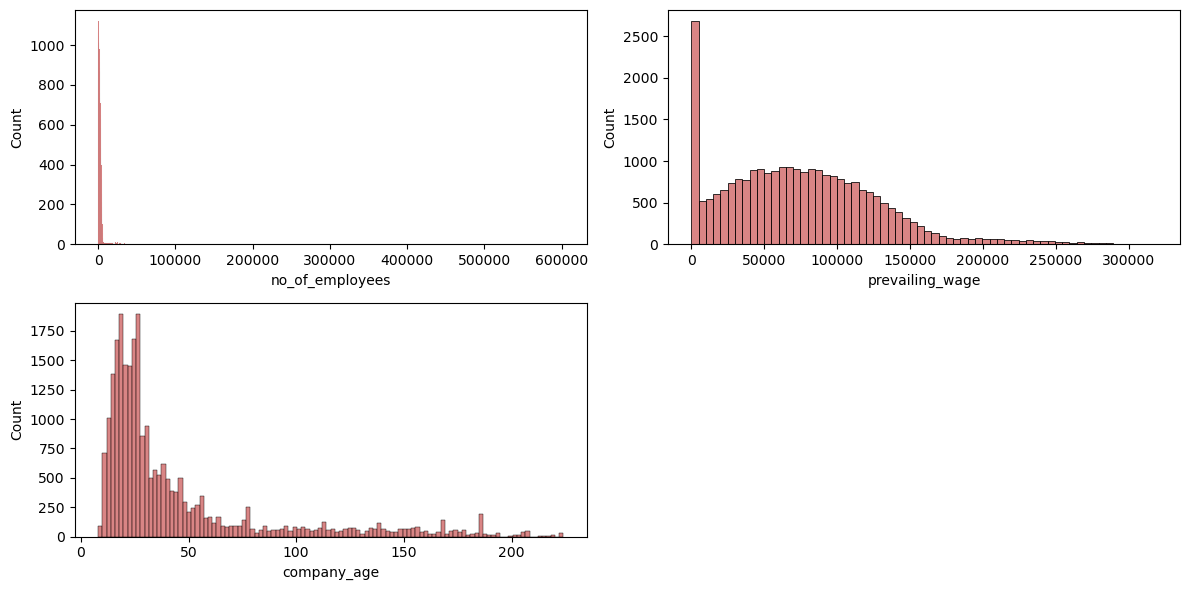

In [20]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()



No of employees and Copmany age column is skewed
Apply a power transform featurewise to make data more Gaussian-like.
Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

<h3>checking Skewness</h3>

<h4>What is Skewness ?</h4>

Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero

In [21]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

Positiviely Skewed : company_age, no_of_employees.<br>
We can handle outliers and then check the skewness.

<h3>Apply Power Transformer to Check if it can reduces the outliers</h3>

In [23]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['company_age', 'no_of_employees']
X_copy = pt.fit_transform(X[transform_features])

In [24]:
X_copy = pd.DataFrame(X_copy, columns=transform_features)

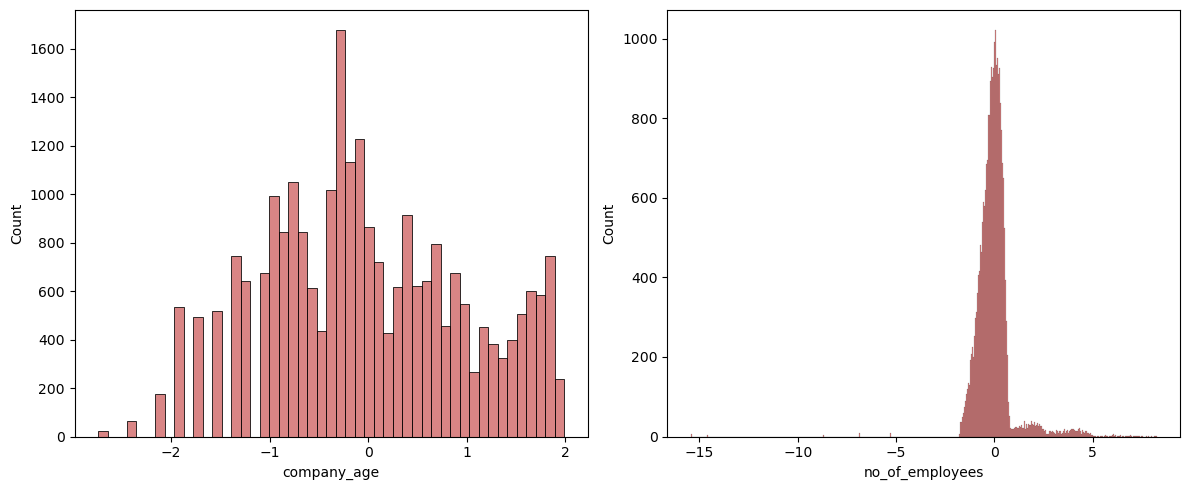

In [25]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(1, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

<h3>Checking Skewness</h3>

In [26]:
X_copy.skew(axis=0, skipna=True)

company_age        0.103264
no_of_employees    0.399339
dtype: float64

here Yeo-Johnson is used and it supports both positive or negative data for transformation.<br>

So Power Transformer with yeo-johnson can be used.

In [27]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


<h3>Feature Encoding and Scaling</h3>

<h4>One Hot Encoding for Columns which had lesser unique values and not ordinal</h4>

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
<br>

<h4>Ordinal Encoding for Columns which has many unique categories</h4>

Ordinal encoding is used here as label encoder is supported for column transformer.
Ordinal encoding is used for Ordinal Variable. Variable comprises a finite set of discrete values with a ranked ordering between values.
<br>

<h4>Standard Scaler</h4>

Standardize features by removing the mean and scaling to unit variance.

<h4>Power Transformer</h4>

Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.

<h4>Selecting number features for preprocessing</h4>

In [28]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [29]:
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

<h2>Preprocessing using Column Transformer</h2>

In [30]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [31]:
X = preprocessor.fit_transform(X)

In [32]:
X


array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

<h2>Classification</h2>

In [1]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py)

<h2>Train Test Split</h2>
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
<br>
It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms.

In [36]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

NameError: name 'X_res' is not defined